In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pywt

from scipy.signal import spectrogram

In [2]:

ADC_BITS = 12
ADC_INTERVALS = 2**ADC_BITS
MAX_VOLTAGE = 3.3
NS = 200
DT = 60
WTYPE = "db2"
APPROX = 1

DISTANCE = 8
HEIGHT = 0.8

In [3]:
iqdata = "../dataset/radar-test/IQ_1707465144.txt"

data = np.loadtxt(iqdata, delimiter=" ")
I_data = data[:, :200]
Q_data = data[:, 200:400]

I_voltage = (I_data / ADC_INTERVALS) * MAX_VOLTAGE
Q_voltage = (Q_data / ADC_INTERVALS) * MAX_VOLTAGE

complex_signal = I_voltage + 1j * Q_voltage

complex_signal = complex_signal - np.mean(complex_signal, axis=1, keepdims=True)

hanning_window = np.hanning(NS) * 2 / 3.3
complex_signal = complex_signal * hanning_window

FileNotFoundError: ./dataset/radar-test/IQ_1707465144.txt not found.

In [ ]:
phase_data = np.angle(complex_signal)
mean_phase_per_sweep = np.mean(phase_data, axis=1)
unwrapped_phase_data = np.unwrap(mean_phase_per_sweep)

wavelet = WTYPE
coeffs = pywt.wavedec(unwrapped_phase_data, wavelet, level=5)
approximation_coeffs = coeffs[APPROX]

analytic_signal = signal.hilbert(approximation_coeffs)
envelope = np.abs(analytic_signal)  # type: ignore

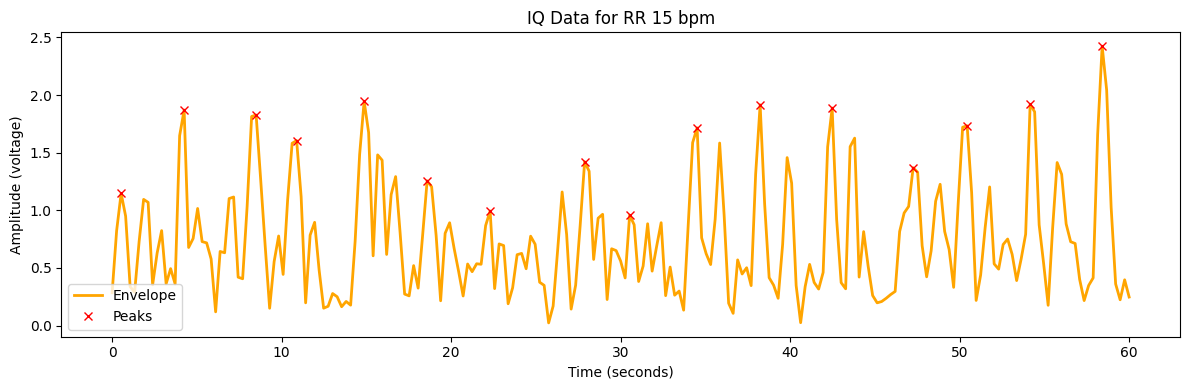

In [ ]:
peaks, _ = signal.find_peaks(envelope, distance=DISTANCE, height=HEIGHT)

num_samples = len(approximation_coeffs)
time_axis = np.linspace(0, 60, num_samples)

# Plotting
plt.figure(figsize=(12, 4))

# Plot sinyal asli
#plt.plot(time_axis, approximation_coeffs, label='Signal', color='blue')

# Plot envelope
plt.plot(time_axis, envelope, label='Envelope', color='orange', linewidth=2)

# Tandai puncak pada envelope
plt.plot(time_axis[peaks], envelope[peaks], 'x', color='red', label='Peaks')

plt.title('IQ Data for RR 15 bpm')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (voltage)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/var/folders/hz/wpmspq9d4yjc8zcf72mcchw40000gn/T/ipykernel_11859/856397027.py:3: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = spectrogram(complex_signal.flatten(), fs=fs, nperseg=NS)


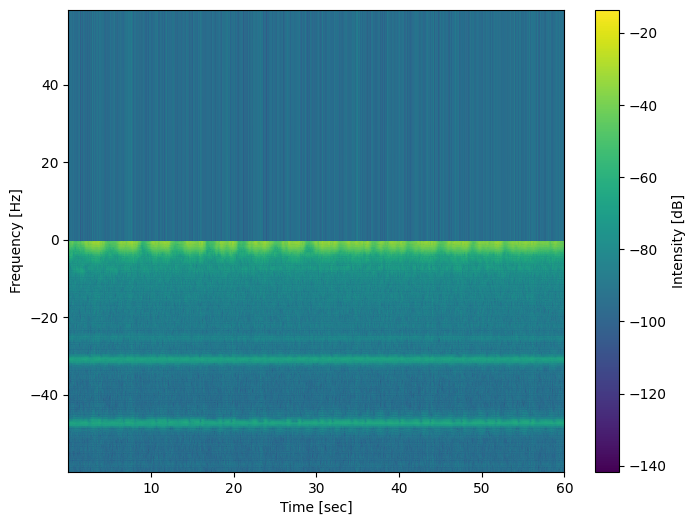

In [ ]:
# Compute the spectrogram
fs = 119.87
f, t, Sxx = spectrogram(complex_signal.flatten(), fs=fs, nperseg=NS)

# Correct the time vector
t = t * (60 / t[-1])

# Plot the spectrogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

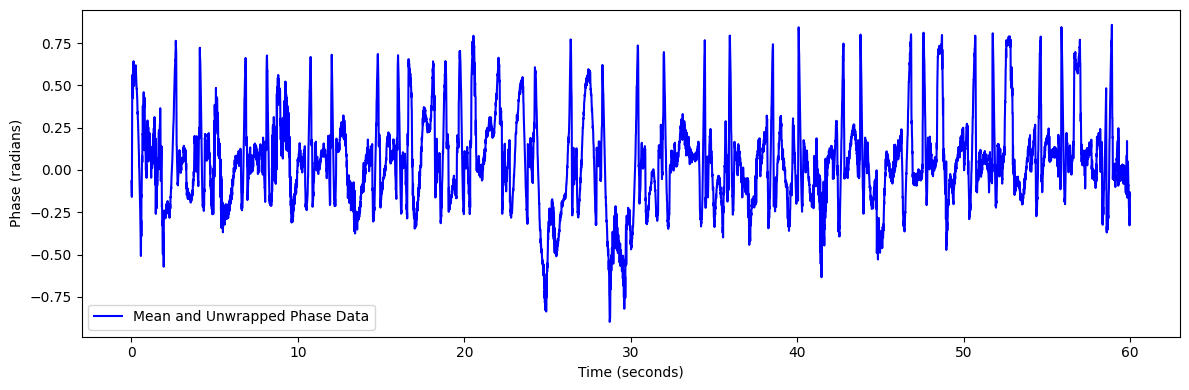

In [ ]:
# Convert sweep index to seconds
sweep_indices = np.arange(len(mean_phase_per_sweep))
time_seconds = sweep_indices * (DT / len(sweep_indices))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(time_seconds, unwrapped_phase_data, label='Mean and Unwrapped Phase Data', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase (radians)')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()

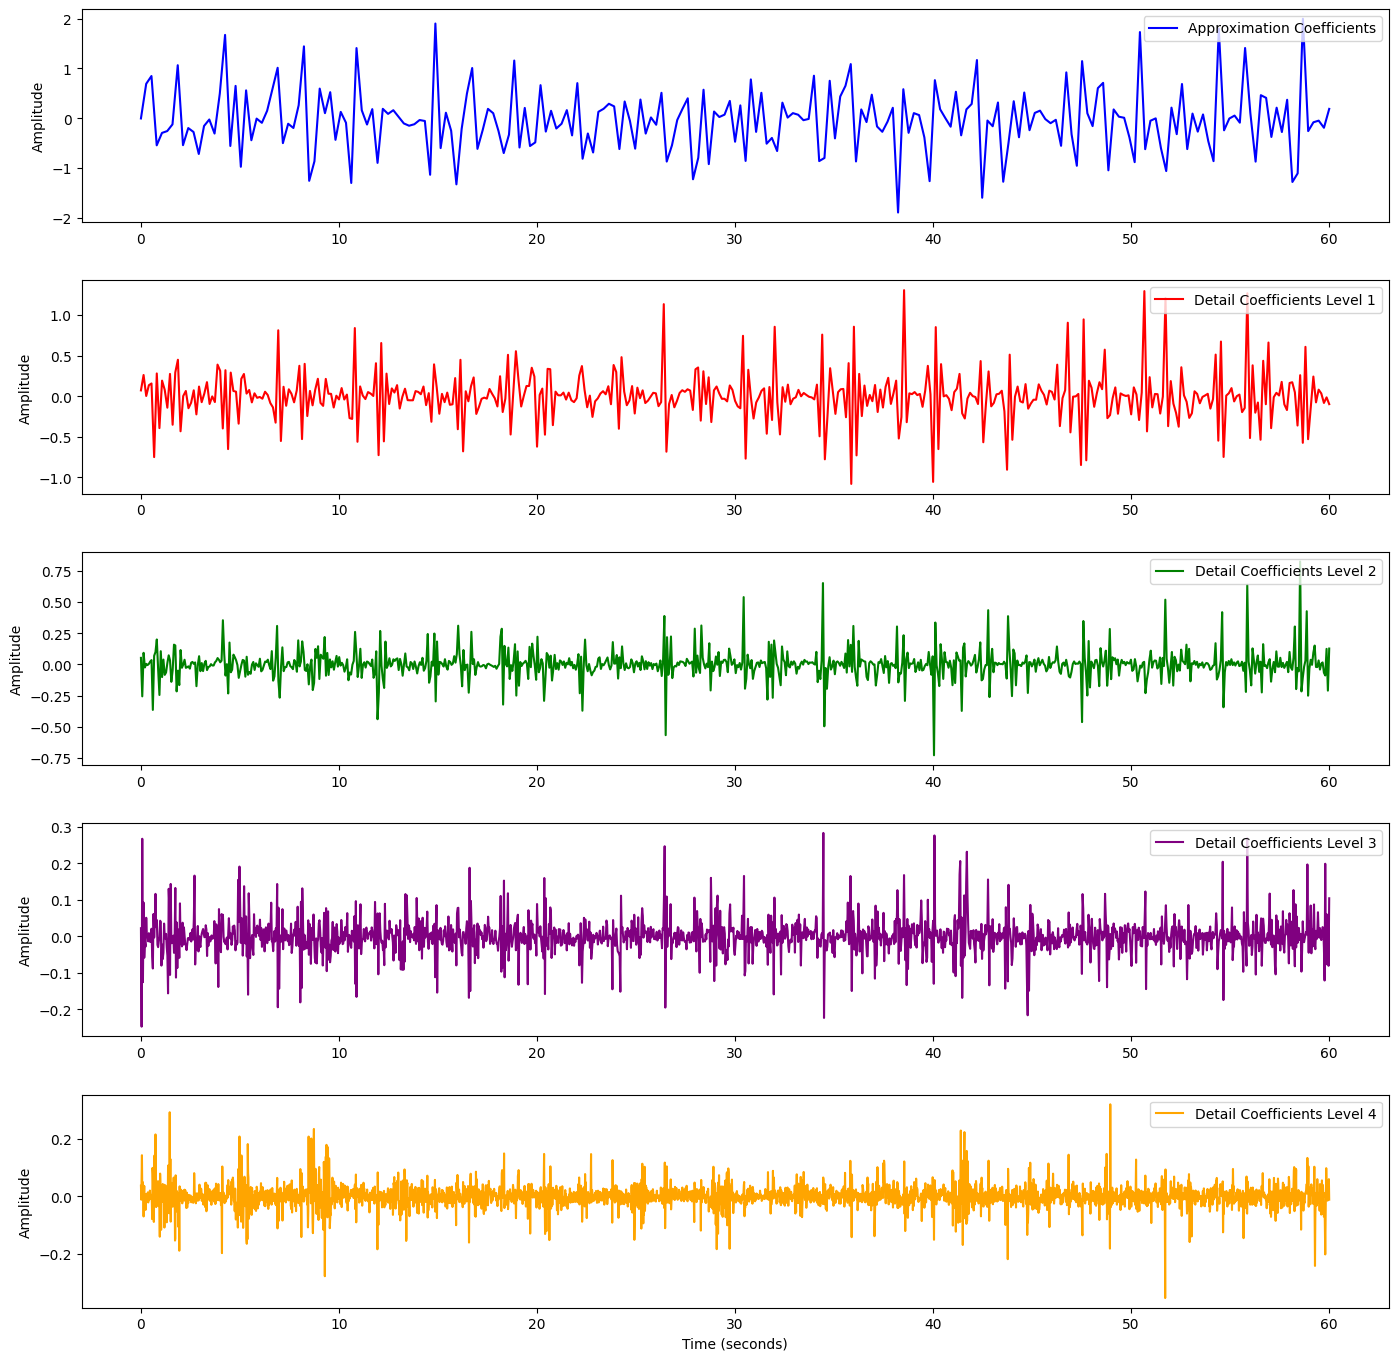

In [ ]:
# Apply wavelet transform
coeffs = pywt.wavedec(unwrapped_phase_data, 'db2', level=5)
approx = coeffs[1]
details = coeffs[2:]

# Generate a new time axis for each level of coefficients
time_axes = [np.linspace(0, DT, len(approx))]
for detail in details:
    time_axes.append(np.linspace(0, DT, len(detail)))

# Define colors for the detail coefficients
colors = ['red', 'green', 'purple', 'orange', 'brown']

# Plot the wavelet transform results
plt.figure(figsize=(14, 16))

# Plot approximation coefficients in blue
plt.subplot(6, 1, 1)
plt.plot(time_axes[0], approx, label='Approximation Coefficients', color='blue')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Plot detail coefficients in different colors
for i, (detail, color) in enumerate(zip(details, colors)):
    plt.subplot(6, 1, i + 2)
    plt.plot(time_axes[i + 1], detail, label=f'Detail Coefficients Level {i + 1}', color=color)
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')

plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()